In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


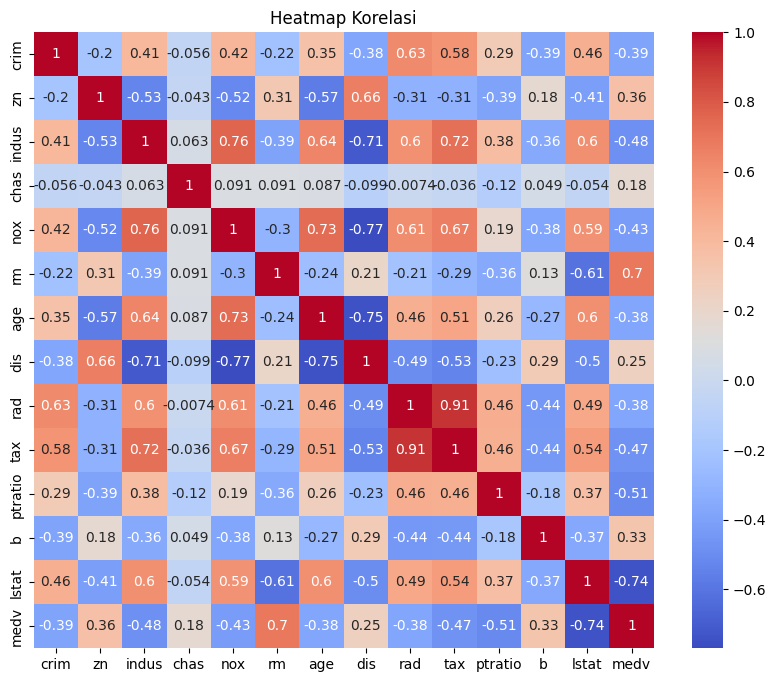

In [ ]:
corr = df.corr()

# Bikin heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Penjelasan Lengkap Persamaan Korelasi Pearson:

1. Definisi:
   - $r$ adalah koefisien korelasi Pearson yang mengukur kekuatan dan arah hubungan linear antara dua variabel.
   - Nilai $r$ berkisar antara -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna), dengan $r = 0$ artinya tidak ada hubungan linear yang signifikan.

2. Numerator:
   - Numerator, yaitu $\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$, merupakan jumlah dari produk deviasi setiap nilai $x_i$ dan $y_i$ terhadap rata-rata masing-masing, $\bar{x}$ dan $\bar{y}$.
   - Jika nilai $x_i$ dan $y_i$ sama-sama di atas atau di bawah rata-rata, produk deviasinya positif, menandakan hubungan positif. Sebaliknya, jika salah satunya di atas dan yang lainnya di bawah rata-rata, produk deviasinya negatif, menandakan hubungan negatif.

3. Denumerator:
   - Denumerator adalah $\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}$.
   - Bagian ini menghitung total variasi masing-masing variabel dengan mengakumulasi kuadrat deviasi terhadap rata-rata, mengalikan kedua jumlah tersebut, lalu diakarkan. Ini menormalisasi nilai $r$, memastikan hasilnya selalu berada dalam rentang -1 sampai 1.

4. Interpretasi:
   - $r = 1$: Hubungan linear positif sempurna, artinya kenaikan $x$ selalu diiringi kenaikan $y$ secara proporsional.
   - $r = -1$: Hubungan linear negatif sempurna, artinya kenaikan $x$ diiringi penurunan $y$ secara proporsional.
   - $r = 0$: Tidak ada hubungan linear yang signifikan antara variabel.

5. Aplikasi:
   - Persamaan ini sering digunakan dalam statistik, machine learning, dan penelitian untuk mengevaluasi serta memahami hubungan antara variabel.
   - Normalisasi pada denumerator memastikan bahwa skala variabel tidak mempengaruhi besarnya koefisien korelasi.


<img src="https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/02.%20Week%202/Picture/Linear_Correlation.png" width="600" height="600">


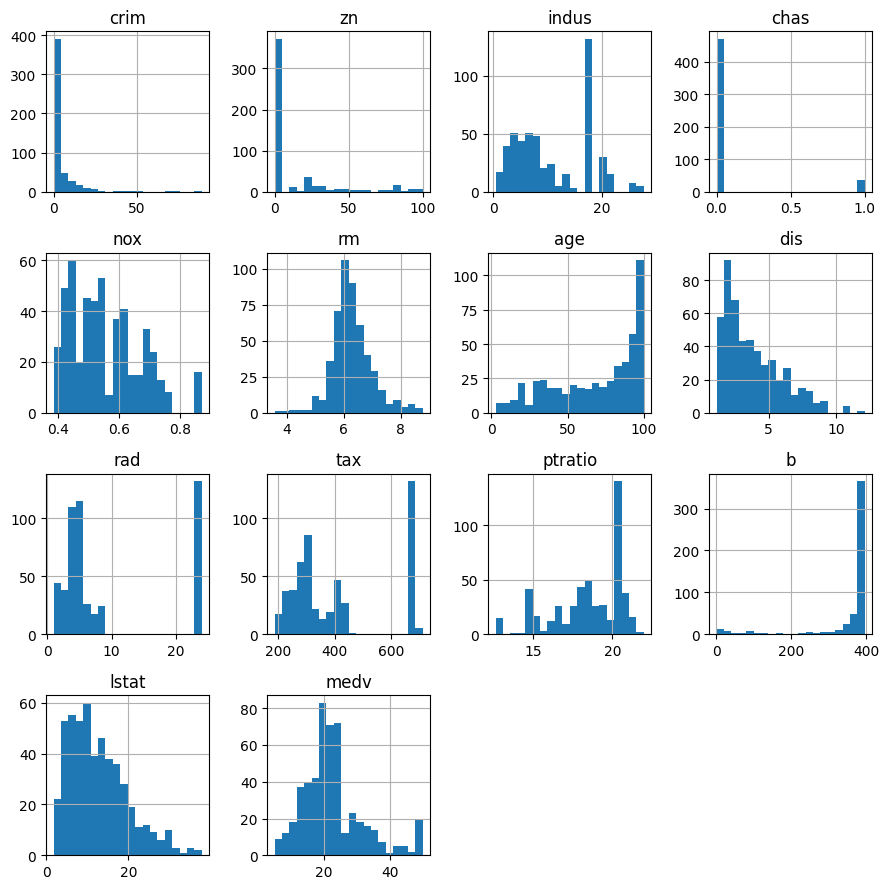

In [ ]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()

Skewness tiap fitur:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


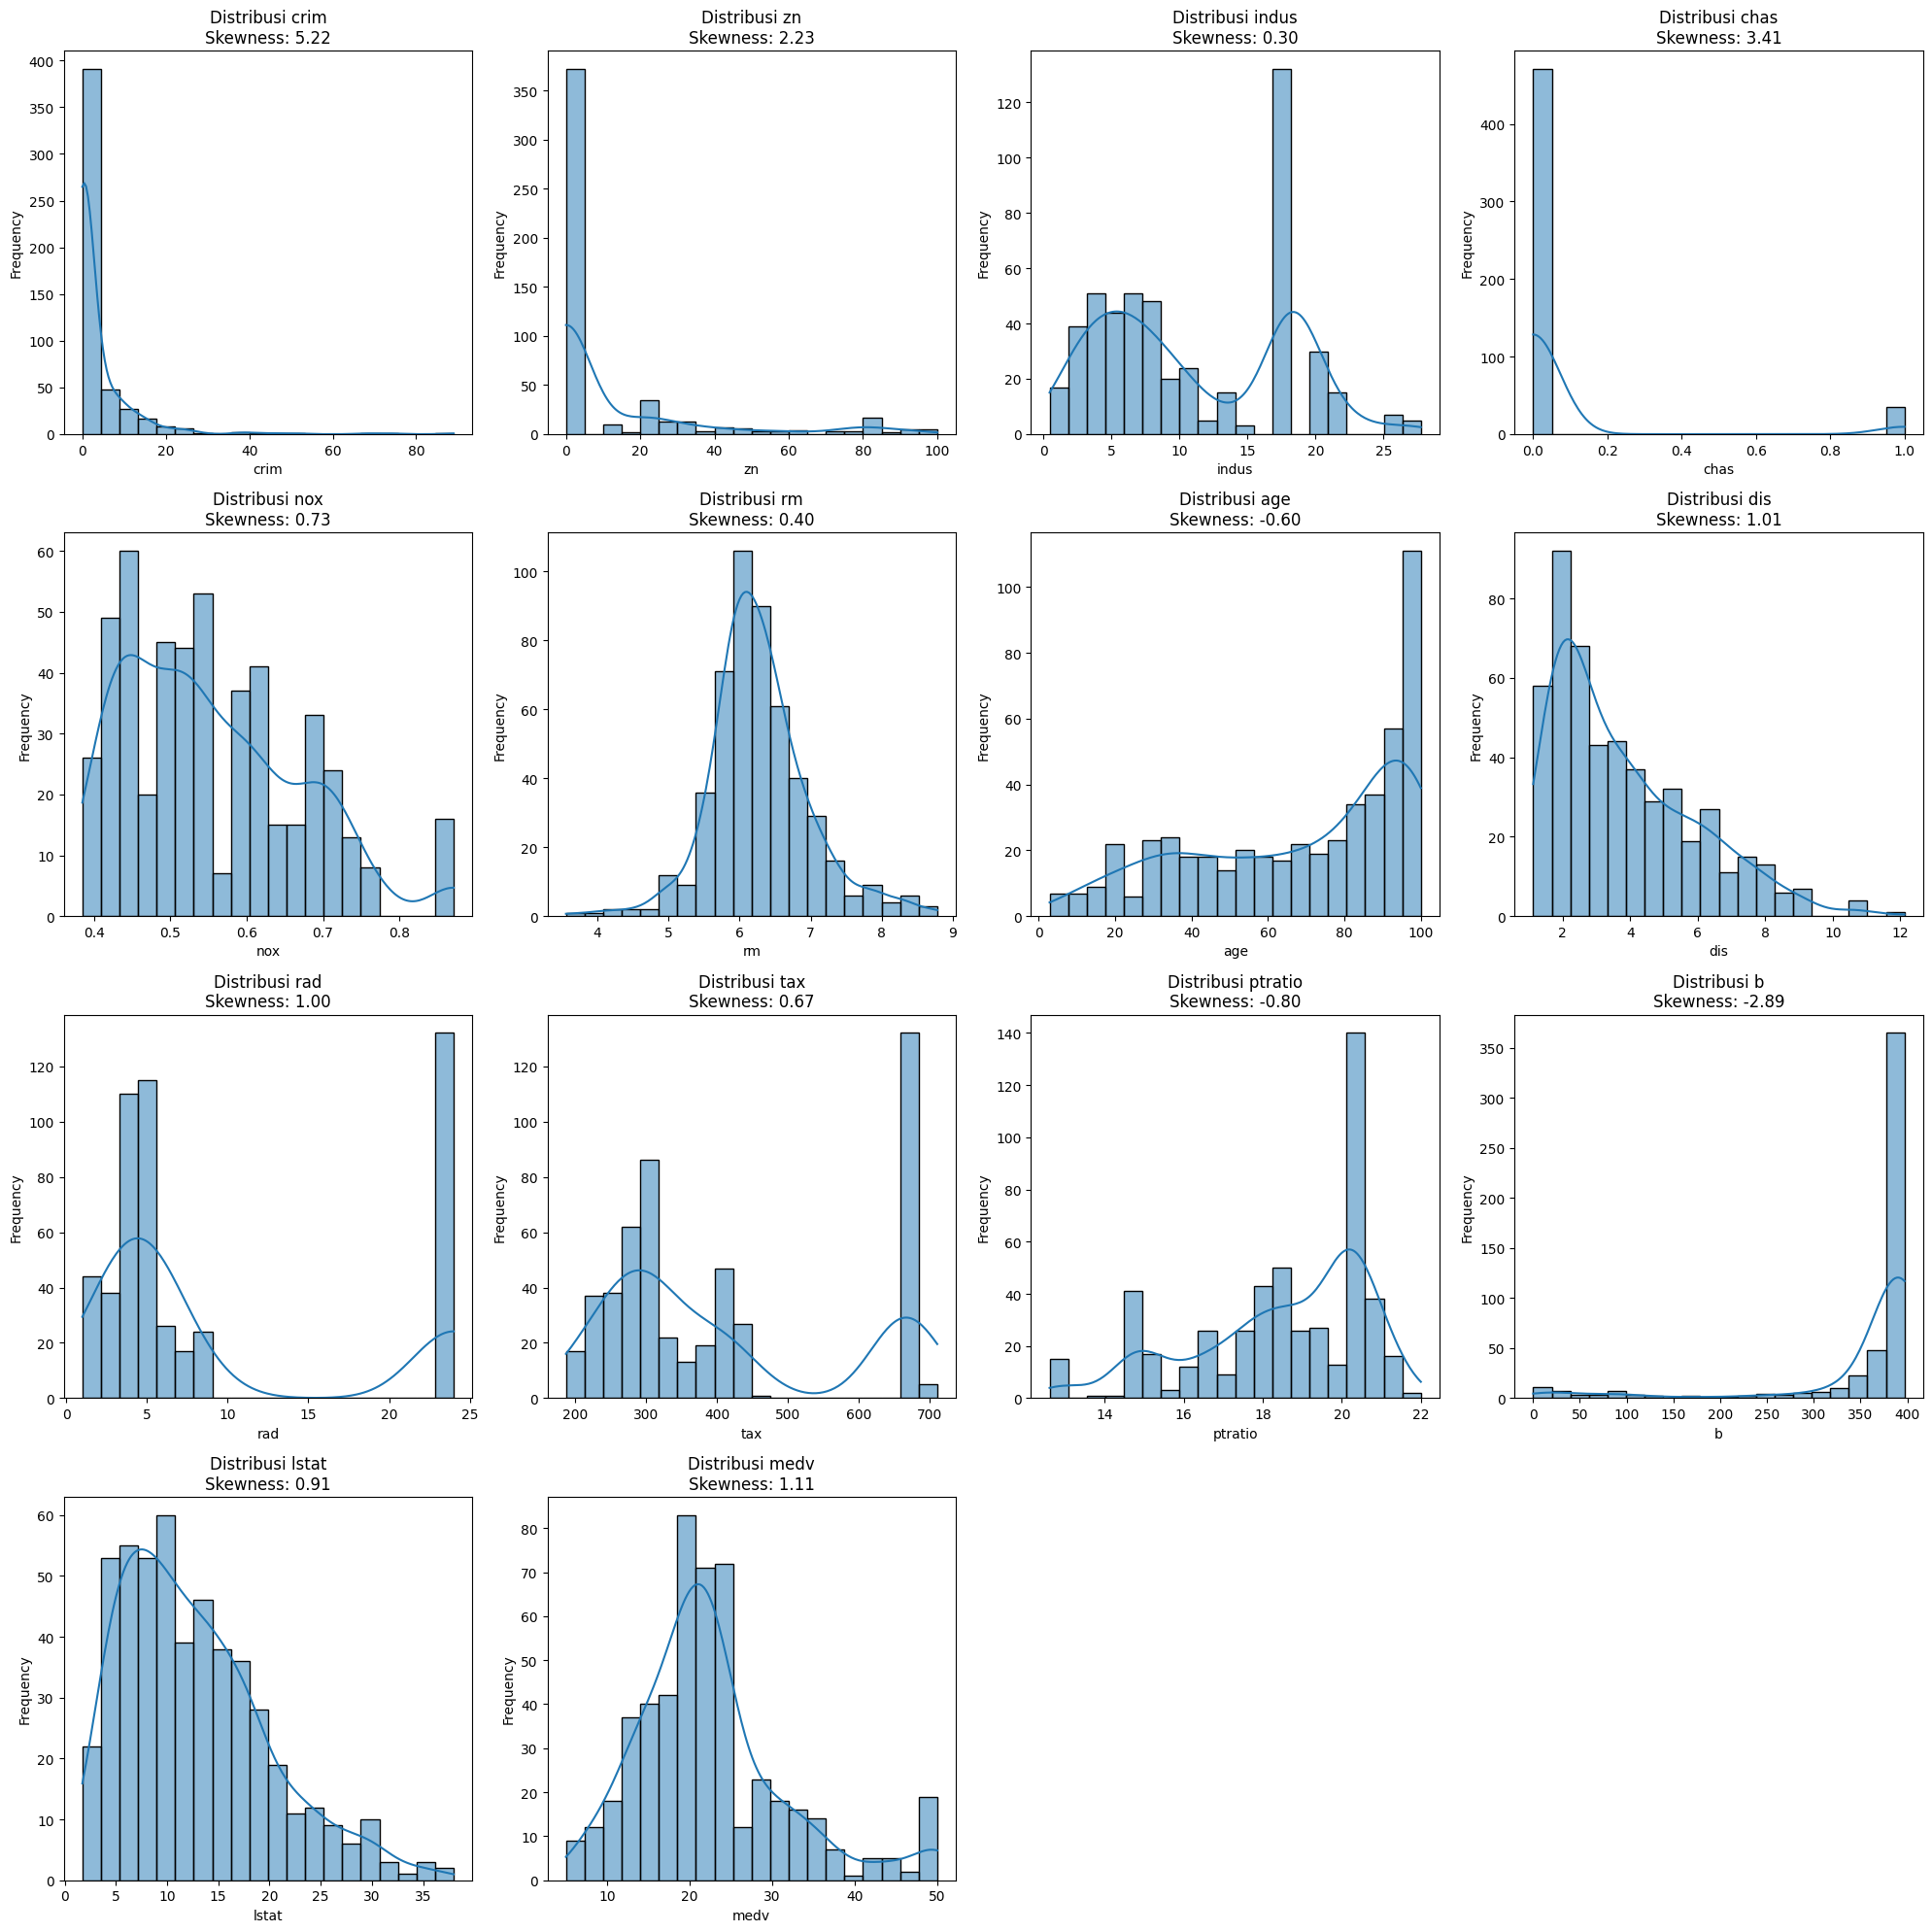

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Skewness tiap fitur:")
print(df.skew())

# Buat figure dengan grid 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Plot tiap fitur di subplot yang udah disediakan
for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Matikan subplot yang kosong kalo fitur kurang dari 16
if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Contoh transformasi log untuk fitur dengan positive skew
df['crim_log'] = np.log1p(df['crim'])
df['zn_log']   = np.log1p(df['zn'])
df['chas_log'] = np.log1p(df['chas'])  # meskipun chas itu dummy, tapi nilainya skewed karena ketidakseimbangan

# Untuk fitur dengan negative skew, lo bisa coba transformasi Yeo-Johnson
from scipy import stats
df['b_yj'], _ = stats.yeojohnson(df['b'])

# Liat lagi skewnessnya setelah transformasi
print("Skewness setelah transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_yj']].skew())

Skewness setelah transformasi:
crim_log    1.269201
zn_log      1.193451
chas_log    3.405904
b_yj       -1.908672
dtype: float64


$$
y^{(\lambda)} =
\begin{cases}
\displaystyle \frac{(y+1)^\lambda - 1}{\lambda}, & \text{if } y \ge 0 \text{ and } \lambda \neq 0, \\[10pt]
\log(y+1), & \text{if } y \ge 0 \text{ and } \lambda = 0, \\[10pt]
-\displaystyle \frac{(-y+1)^{2-\lambda} - 1}{2-\lambda}, & \text{if } y < 0 \text{ and } \lambda \neq 2, \\[10pt]
-\log(-y+1), & \text{if } y < 0 \text{ and } \lambda = 2.
\end{cases}
$$


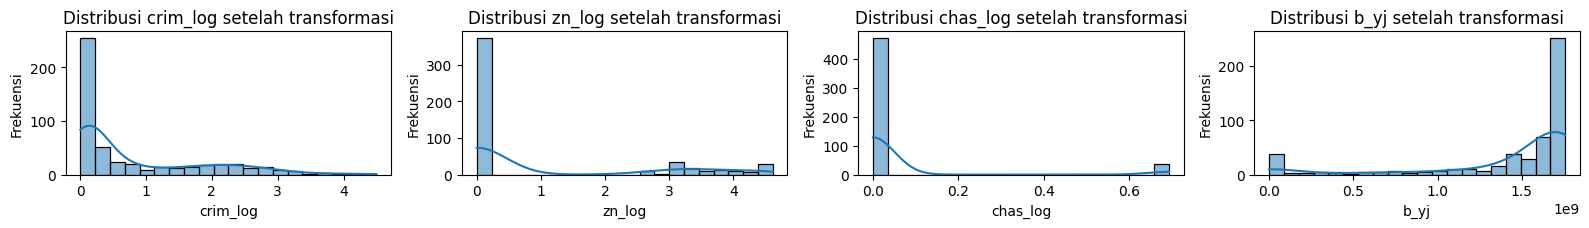

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))  # 4x4 grid, total 16 subplot
axes = axes.flatten()

# Looping buat plot tiap fitur
for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

# Hapus axes yang gak kepake (biar gak nampilin plot kosong)
for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Copy dataset dan replace fitur asli dengan transformasi yang udah dibuat
df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn']   = df_model['zn_log']
df_model['chas'] = df_model['chas_log']
df_model['b']    = df_model['b_yj']

# Misal targetnya tetap 'medv'
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.950581042460257


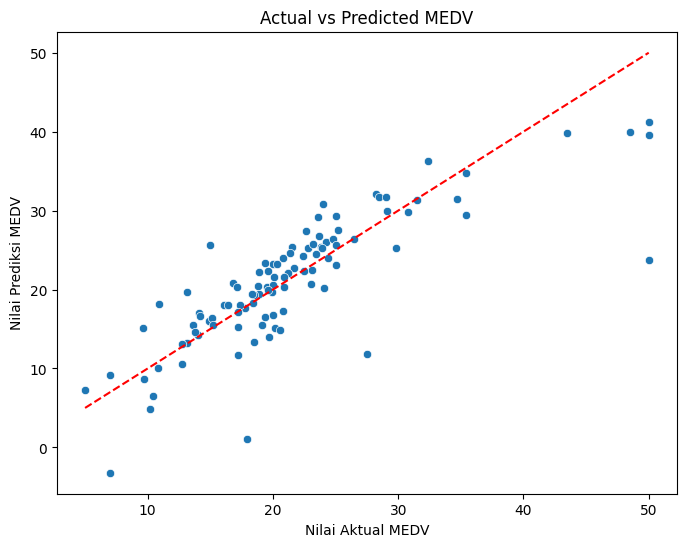

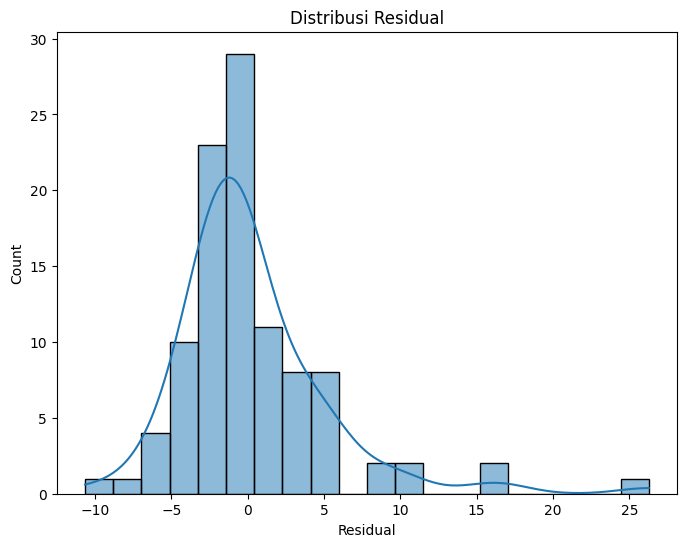

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line perfect prediction
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

# Question!

1. Pada model di atas menggunakan transformasi data Yeo-Johnson. Eksplorasi transformasi data lainnya seperti Log Transform, Box-Cox Transform, atau Quantile Transform. Lakukan pembuatan model dengan masing-masing transformasi dan bandingkan hasilnya!

2. Lakukan eksplorasi terhadap metode normalisasi dan standardisasi data. Bandingkan metode MinMax Scaling, Standard Scaling, dan Robust Scaling dalam konteks data yang mengandung outlier. Bagaimana dampaknya terhadap akurasi model!

3. Pada model sebelumnya, fitur numerik langsung digunakan tanpa encoding. Eksplorasi apakah melakukan discretization pada fitur numerik dapat meningkatkan performa model, dibandingkan dengan tetap menggunakan fitur dalam bentuk kontinu.

# Penjelasan Pertanyaan diatas dengan lebih mendetail

---

## 1. Transformasi Data

**Deskripsi:**  
Pada model di atas digunakan transformasi data Yeo-Johnson.

**Tugas:**  
Eksplorasi transformasi data alternatif seperti **Log Transform**, **Box-Cox Transform**, dan **Quantile Transform**.

**Langkah Kerja:**  
- Lakukan pembuatan model dengan masing-masing metode transformasi.  
- Bandingkan hasil performa model yang dihasilkan dari tiap metode.

---

## 2. Normalisasi dan Standardisasi Data

**Deskripsi:**  
Metode normalisasi dan standardisasi perlu dieksplorasi, terutama pada data yang mengandung outlier.

**Tugas:**  
Bandingkan metode **MinMax Scaling**, **Standard Scaling**, dan **Robust Scaling**.

**Langkah Kerja:**  
- Terapkan masing-masing metode pada dataset yang mengandung outlier.  
- Analisis dan evaluasi dampak dari masing-masing metode terhadap akurasi model.

---

## 3. Discretization pada Fitur Numerik

**Deskripsi:**  
Pada model sebelumnya, fitur numerik digunakan dalam bentuk kontinu tanpa encoding.

**Tugas:**  
Eksplorasi apakah melakukan **discretization** pada fitur numerik dapat meningkatkan performa model.

**Langkah Kerja:**  
- Ubah fitur numerik menjadi bentuk kategori melalui teknik discretization.  
- Lakukan pelatihan model dengan fitur yang telah didiscretisasi.  
- Bandingkan performa model dengan model yang menggunakan fitur kontinu.

---

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
# 1. Load Dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [16]:
# 2. Menambahkan Outlier
df_outlier = df.copy()
df_outlier.loc[0, 'crim'] = df_outlier['crim'].max() * 10
df_outlier.loc[1, 'tax'] = df_outlier['tax'].max() * 10

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). 

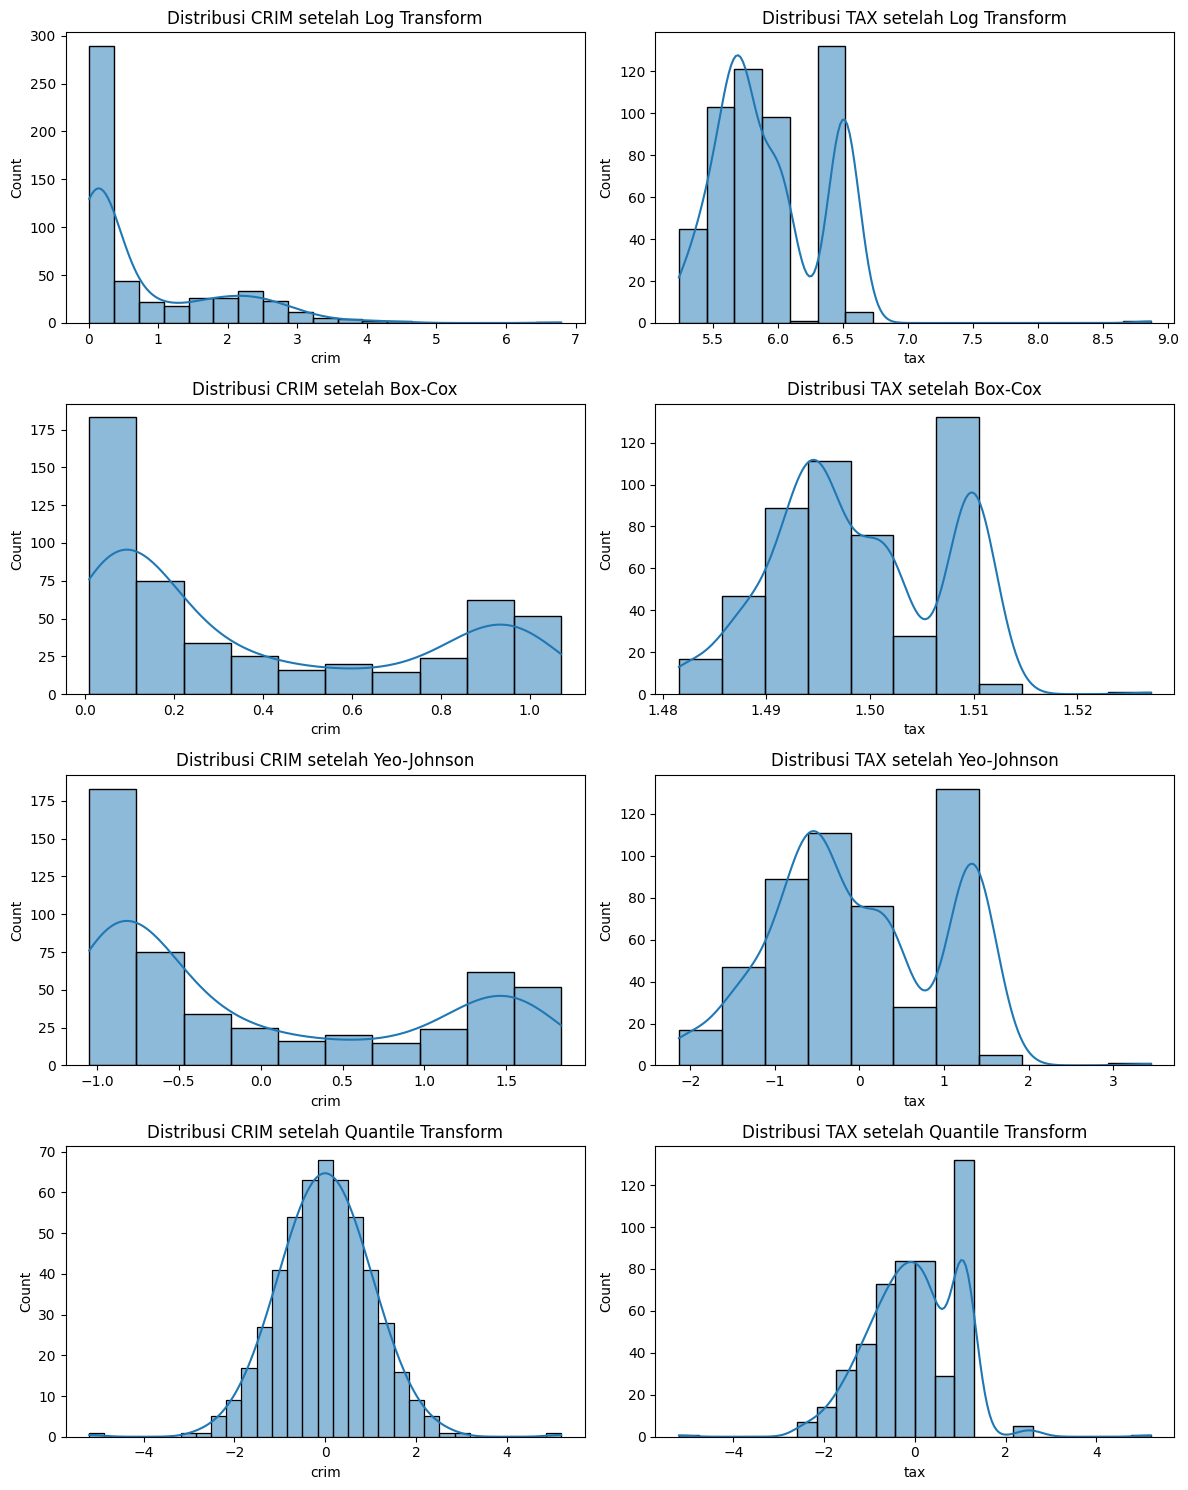

In [18]:
# 3. Eksplorasi Transformasi Data
transformations = {
    "Log Transform": lambda x: np.log1p(x),
    "Box-Cox": lambda x: stats.boxcox(x + 1)[0] if x.min() >= 0 else x,
    "Yeo-Johnson": PowerTransformer(method="yeo-johnson").fit_transform,
    "Quantile Transform": QuantileTransformer(output_distribution="normal").fit_transform
}

# Menyimpan hasil transformasi
df_transformed = {}

for name, func in transformations.items():
    df_temp = df_outlier.copy()
    for col in df_temp.columns.drop("medv"):
        df_temp[col] = func(df_temp[col].values.reshape(-1, 1)) if name in ["Yeo-Johnson", "Quantile Transform"] else func(df_temp[col])
    df_transformed[name] = df_temp

# Visualisasi Distribusi Setelah Transformasi
fig, axes = plt.subplots(len(transformations), 2, figsize=(12, 15))
for i, (name, df_temp) in enumerate(df_transformed.items()):
    sns.histplot(df_temp['crim'], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribusi CRIM setelah {name}")

    sns.histplot(df_temp['tax'], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Distribusi TAX setelah {name}")

plt.tight_layout()
plt.show()


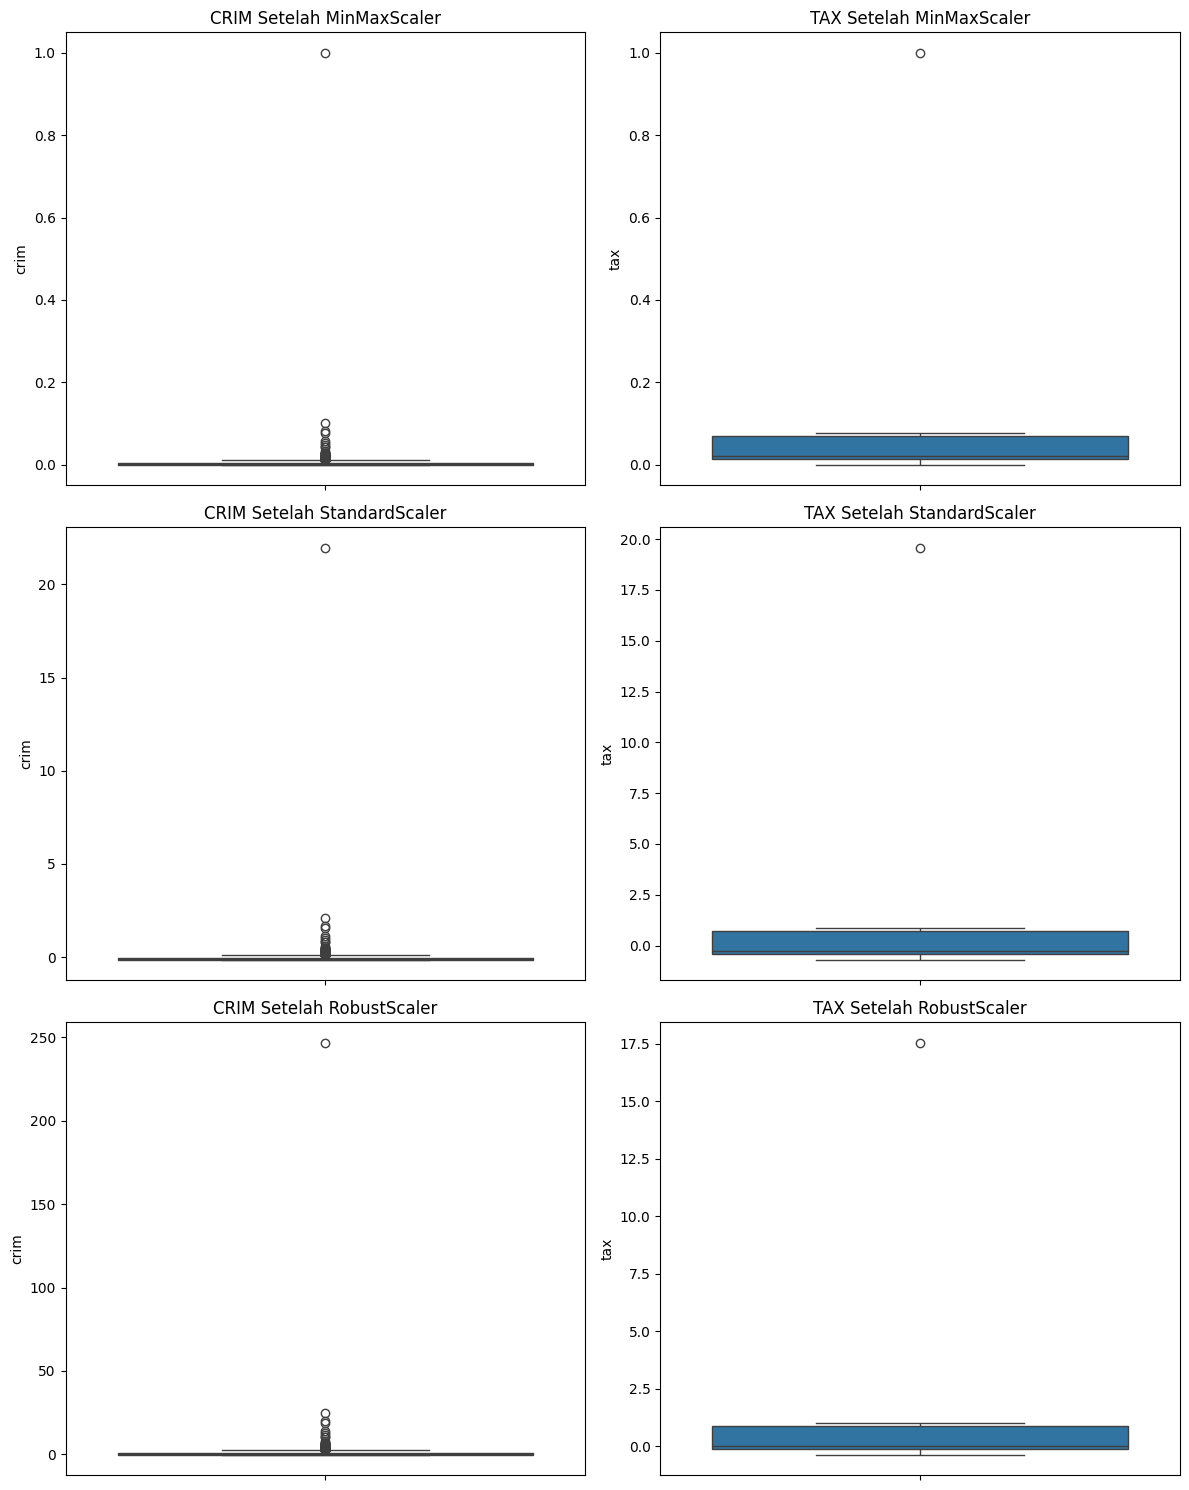

In [19]:
# 4. Normalisasi dan Standardisasi
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}

df_scaled = {}

for name, scaler in scalers.items():
    df_temp = df_outlier.copy()
    df_temp[df_temp.columns.drop("medv")] = scaler.fit_transform(df_temp[df_temp.columns.drop("medv")])
    df_scaled[name] = df_temp

# Visualisasi Efek Scaling
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
for i, (name, df_temp) in enumerate(df_scaled.items()):
    sns.boxplot(y=df_temp['crim'], ax=axes[i, 0])
    axes[i, 0].set_title(f"CRIM Setelah {name}")

    sns.boxplot(y=df_temp['tax'], ax=axes[i, 1])
    axes[i, 1].set_title(f"TAX Setelah {name}")

plt.tight_layout()
plt.show()


In [20]:
# 5. Evaluasi Model untuk Scaling
results = {}

for name, df_temp in df_scaled.items():
    X = df_temp.drop(['medv'], axis=1)
    y = df_temp['medv']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = mse
    print(f"MSE dengan {name}: {mse}")

MSE dengan MinMaxScaler: 109.40439604635009
MSE dengan StandardScaler: 109.40439604635029
MSE dengan RobustScaler: 109.40439604635037


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 11 are removed. Consider decreasing the number of bins.
  warnings.warn(


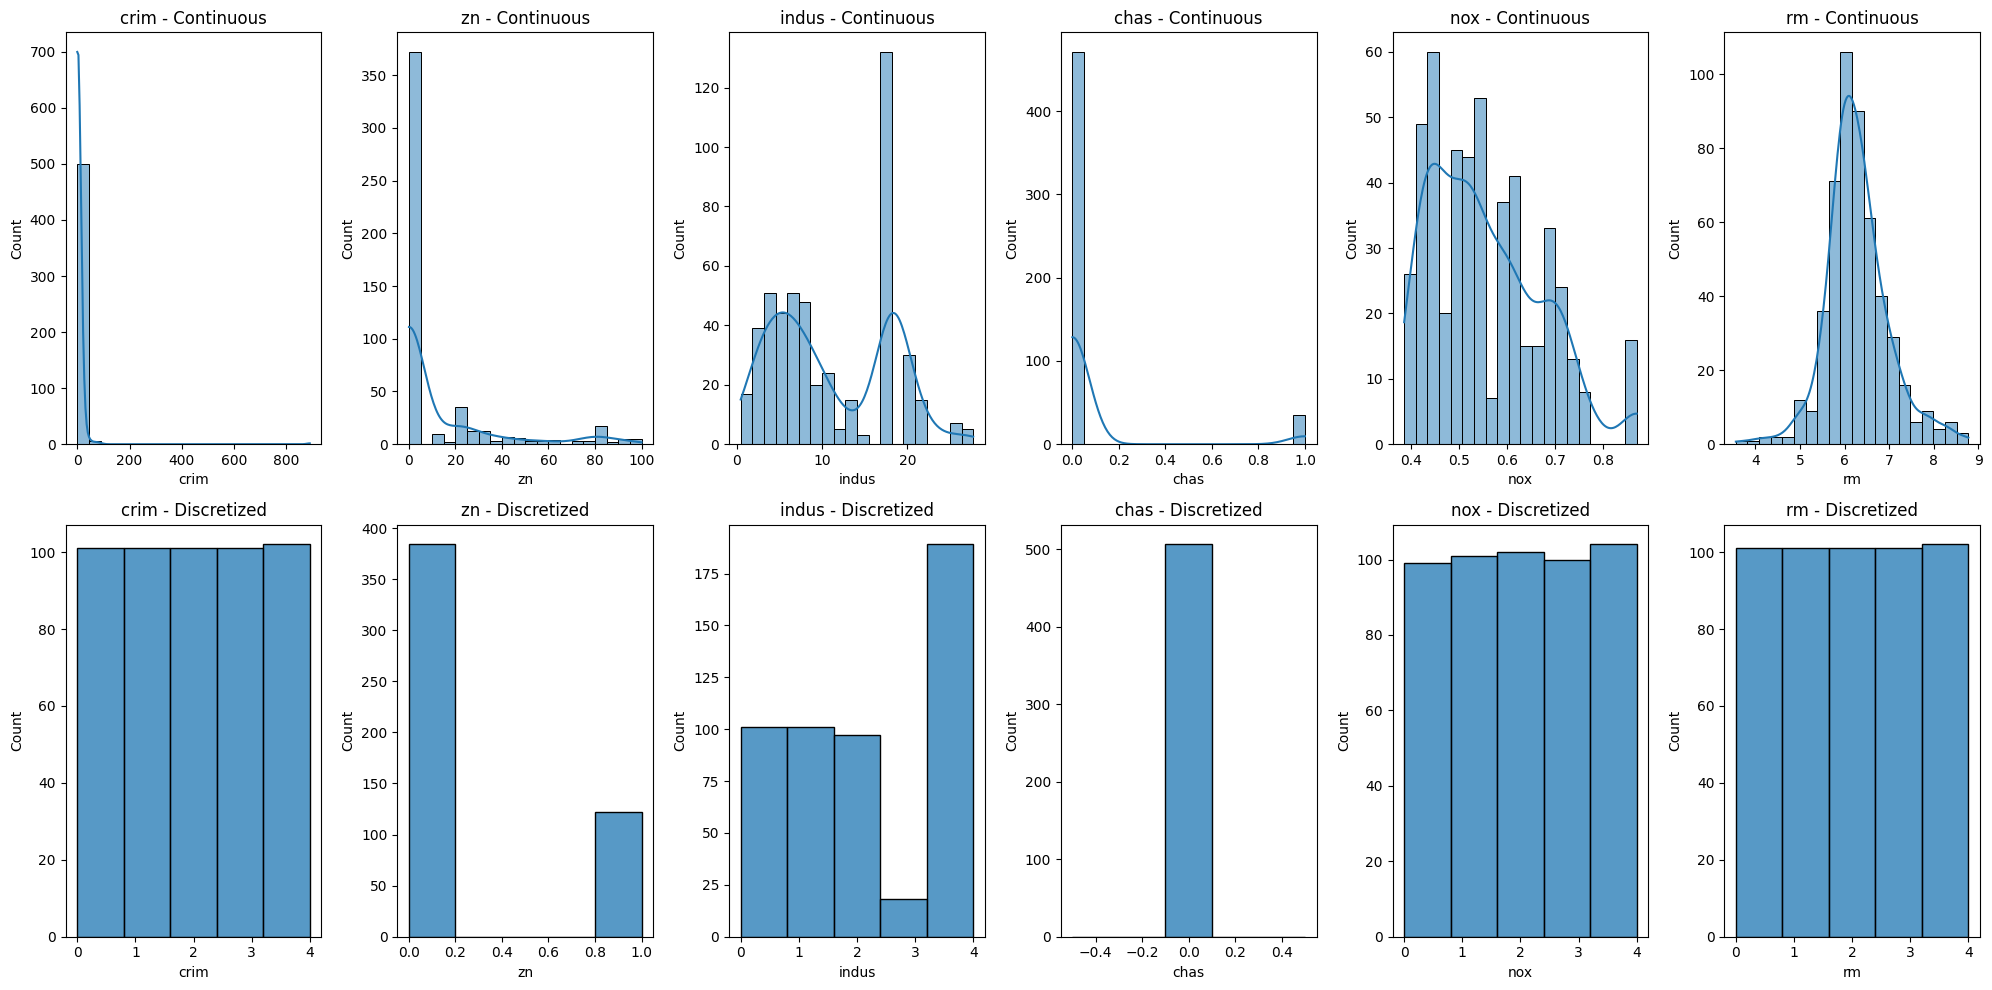

MSE dengan fitur kontinu: 109.4043960463489
MSE dengan fitur discretized: 28.82387041524113


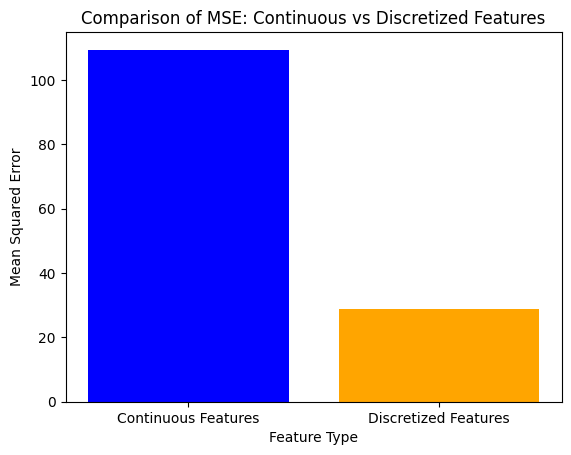

In [22]:
# 6. Discretization pada Fitur Numerik
num_features = df_outlier.drop(['medv'], axis=1).columns
df_disc = df_outlier.copy()
disc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

df_disc[num_features] = disc.fit_transform(df_disc[num_features])

# Perbandingan Distribusi Fitur Kontinu vs Discretized
fig, axes = plt.subplots(2, len(num_features)//2, figsize=(20, 10))
for i, feature in enumerate(num_features[:len(num_features)//2]):
    sns.histplot(df_outlier[feature], bins=20, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"{feature} - Continuous")

    sns.histplot(df_disc[feature], bins=5, kde=False, ax=axes[1, i])
    axes[1, i].set_title(f"{feature} - Discretized")

plt.tight_layout()
plt.show()

# Evaluasi Model dengan Fitur Discretized vs Kontinu
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

X_cont = df_outlier.drop(['medv'], axis=1)
y = df_outlier['medv']
mse_cont = train_and_evaluate(X_cont, y)

X_disc = df_disc.drop(['medv'], axis=1)
mse_disc = train_and_evaluate(X_disc, y)

print(f"MSE dengan fitur kontinu: {mse_cont}")
print(f"MSE dengan fitur discretized: {mse_disc}")

plt.bar(["Continuous Features", "Discretized Features"], [mse_cont, mse_disc], color=['blue', 'orange'])
plt.xlabel("Feature Type")
plt.ylabel("Mean Squared Error")
plt.title("Comparison of MSE: Continuous vs Discretized Features")
plt.show()

### **1. Transformasi Data**  
Transformasi data digunakan untuk mengatasi **skewness** dan meningkatkan distribusi data agar lebih mendekati distribusi normal. Berikut adalah beberapa metode yang digunakan:  

#### **a. Log Transform**  
Log transform berguna untuk mengurangi skewness terutama pada data yang memiliki distribusi skewed positif. Rumusnya:  
$$
X' = \log(1 + X)
$$  
Dimana:  
- \(X\) adalah nilai asli  
- \(X'\) adalah nilai setelah transformasi  
- \(\log\) adalah fungsi logaritma natural  

#### **b. Box-Cox Transform**  
Box-Cox Transform bekerja hanya pada data yang bernilai positif dan dapat mengubah distribusi agar lebih simetris. Rumusnya:  
$$
X' =
\begin{cases}
\frac{X^\lambda - 1}{\lambda}, & \lambda \neq 0 \\
\log(X), & \lambda = 0
\end{cases}
$$  
Dimana:  
- \(\lambda\) adalah parameter transformasi yang dicari secara otomatis  
- Jika \(\lambda = 0\), maka digunakan log transform  

#### **c. Quantile Transform**  
Quantile Transform mengubah distribusi data dengan menggunakan fungsi kumulatif (CDF) sehingga data menjadi lebih menyerupai distribusi normal.  
$$
X' = F^{-1} (F(X))
$$  
Dimana:  
- \(F(X)\) adalah cumulative distribution function (CDF)  
- \(F^{-1}\) adalah inverse CDF dari distribusi target (misalnya distribusi normal)  

---

### **2. Normalisasi dan Standardisasi Data**  
Normalisasi dan standardisasi digunakan untuk menyamakan skala data agar model dapat bekerja lebih baik, terutama dalam kasus **outlier**.  

#### **a. MinMax Scaling**  
Metode ini menskalakan data dalam rentang \([0,1]\) atau \([-1,1]\).  
$$
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
$$  
- Sensitif terhadap **outlier**, karena bergantung pada nilai **min** dan **max**.  

#### **b. Standard Scaling (Z-score)**  
Standard scaling mengubah data menjadi distribusi dengan **mean = 0** dan **standard deviation = 1**.  
$$
X' = \frac{X - \mu}{\sigma}
$$  
Dimana:  
- \(\mu\) adalah **mean** dari data  
- \(\sigma\) adalah **standar deviasi**  
- **Kurang sensitif terhadap outlier** dibandingkan MinMax Scaling.  

#### **c. Robust Scaling**  
Robust Scaling lebih tahan terhadap **outlier** karena menggunakan **median** dan **Interquartile Range (IQR)**.  
$$
X' = \frac{X - Q_2}{Q_3 - Q_1}
$$  
Dimana:  
- \(Q_2\) adalah **median**  
- \(Q_1\) adalah **kuartil pertama** (25%)  
- \(Q_3\) adalah **kuartil ketiga** (75%)  

---

### **3. Discretization pada Fitur Numerik**  
Discretization mengubah fitur numerik menjadi kategori berdasarkan interval tertentu. Salah satu metode yang digunakan adalah **KBinsDiscretizer** dengan **equal-width binning**.  

$$
X' = \left\lfloor \frac{X - X_{min}}{\Delta} \right\rfloor
$$  

Dimana:  
- \(\Delta = \frac{X_{max} - X_{min}}{n\_bins}\) adalah lebar tiap bin  
- \(X'\) adalah kategori baru setelah discretization  

---

### **4. Evaluasi Model dengan Mean Squared Error (MSE)**  
Untuk membandingkan efektivitas metode yang telah diterapkan, kita menggunakan **Mean Squared Error (MSE)**:  

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$  

Dimana:  
- \(y_i\) adalah nilai aktual  
- \(\hat{y}_i\) adalah nilai prediksi  
- \(n\) adalah jumlah sampel  

Semakin kecil nilai **MSE**, semakin baik performa model.
